# Data Wrangling and EDA

How online stores can help customers to buy the right product from their millions of products,so that online retailers can retain the customer from going elsewhere and see yearly increase in their average order value. Build a recommendation system so that customers can get the right product with personalized info.

Online stores show millions of products to the customer from their catalog. Choosing the correct product for their needs is becoming difficult because of so much information.Since customers are more likely to buy based on personalized recommendations, management has decided to go for a recommendation system so that they can retain the customer and hence increase yearly product sales


## Refernces

The dataset here is taken from the below website.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/links.html) The repository has several datasets. For this case study, I am using the Electronics dataset.

## Data Dictionary

### Sample review dataset:

    {
      "reviewerID": "A2SUAM1J3GNN3B",
      "asin": "0000013714",
      "reviewerName": "J. McDonald",
      "helpful": [2, 3],
      "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
      "overall": 5.0,
      "summary": "Heavenly Highway Hymns",
      "unixReviewTime": 1252800000,
      "reviewTime": "09 13, 2009"
    }

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

### Sample Meta data

    {
      "asin": "0000031852",
      "title": "Girls Ballet Tutu Zebra Hot Pink",
      "price": 3.17,
      "imUrl": "http://ecx.images-amazon.com/images/I/51fAmVkTbyL._SY300_.jpg",
      "related":
      {
        "also_bought": ["B00JHONN1S", "B002BZX8Z6", "B00D2K1M3O", "0000031909", "B00613WDTQ", "B00D0WDS9A", "B00D0GCI8S", "0000031895", "B003AVKOP2", "B003AVEU6G", "B003IEDM9Q", "B002R0FA24", "B00D23MC6W", "B00D2K0PA0", "B00538F5OK", "B00CEV86I6", "B002R0FABA", "B00D10CLVW", "B003AVNY6I", "B002GZGI4E", "B001T9NUFS", "B002R0F7FE", "B00E1YRI4C", "B008UBQZKU", "B00D103F8U", "B007R2RM8W"],
        "also_viewed": ["B002BZX8Z6", "B00JHONN1S", "B008F0SU0Y", "B00D23MC6W", "B00AFDOPDA", "B00E1YRI4C", "B002GZGI4E", "B003AVKOP2", "B00D9C1WBM", "B00CEV8366", "B00CEUX0D8", "B0079ME3KU", "B00CEUWY8K", "B004FOEEHC", "0000031895", "B00BC4GY9Y", "B003XRKA7A", "B00K18LKX2", "B00EM7KAG6", "B00AMQ17JA", "B00D9C32NI", "B002C3Y6WG", "B00JLL4L5Y", "B003AVNY6I", "B008UBQZKU", "B00D0WDS9A", "B00613WDTQ", "B00538F5OK", "B005C4Y4F6", "B004LHZ1NY", "B00CPHX76U", "B00CEUWUZC", "B00IJVASUE", "B00GOR07RE", "B00J2GTM0W", "B00JHNSNSM", "B003IEDM9Q", "B00CYBU84G", "B008VV8NSQ", "B00CYBULSO", "B00I2UHSZA", "B005F50FXC", "B007LCQI3S", "B00DP68AVW", "B009RXWNSI", "B003AVEU6G", "B00HSOJB9M", "B00EHAGZNA", "B0046W9T8C", "B00E79VW6Q", "B00D10CLVW", "B00B0AVO54", "B00E95LC8Q", "B00GOR92SO", "B007ZN5Y56", "B00AL2569W", "B00B608000", "B008F0SMUC", "B00BFXLZ8M"],
        "bought_together": ["B002BZX8Z6"]
      },
      "salesRank": {"Toys & Games": 211836},
      "brand": "Coxlures",
      "categories": [["Sports & Outdoors", "Other Sports", "Dance"]]
    }

* asin - ID of the product, e.g. 0000031852
* title - name of the product
* price - price in US dollars (at time of crawl)
* imUrl - url of the product image
* related - related products (also bought, also viewed, bought together, buy after viewing)
* salesRank - sales rank information
* brand - brand name
* categories - list of categories the product belongs to

## Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load data to CSV
dfr = pd.read_csv('../Data/2.reviews_cleaned.csv',header=0)

In [32]:
dfr.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,A2B4F6LP0ZLI8E,0594296420,Carol,"[1, 1]",I bought this item to replace the original cha...,3.0,Plug replacement needed,1398556800,"04 27, 2014",http://ecx.images-amazon.com/images/I/41Wwbxms...,If you prefer to charge your NOOK Simple Touch...,"[['Electronics', 'Computers & Accessories', 'L...",Barnes &amp; Noble NOOK Simple Touch Wall Adap...,6.99,{},"{'also_bought': ['B0087UBS4M', 'B0032UP32K', '...",Barnes &amp; Noble
1,A1RKH6803HVOQL,0594296420,"Col ""Col""","[1, 1]",This is a NOOK product and works as advertised...,5.0,Works with NOOK as advertised,1365379200,"04 8, 2013",http://ecx.images-amazon.com/images/I/41Wwbxms...,If you prefer to charge your NOOK Simple Touch...,"[['Electronics', 'Computers & Accessories', 'L...",Barnes &amp; Noble NOOK Simple Touch Wall Adap...,6.99,{},"{'also_bought': ['B0087UBS4M', 'B0032UP32K', '...",Barnes &amp; Noble
2,A3ZNVCQCG57AY,0594296420,Kelly K.,"[0, 0]",I purchased this plug to see if it would work ...,5.0,Works to Charge my Toshiba Excite Tablet,1359331200,"01 28, 2013",http://ecx.images-amazon.com/images/I/41Wwbxms...,If you prefer to charge your NOOK Simple Touch...,"[['Electronics', 'Computers & Accessories', 'L...",Barnes &amp; Noble NOOK Simple Touch Wall Adap...,6.99,{},"{'also_bought': ['B0087UBS4M', 'B0032UP32K', '...",Barnes &amp; Noble


In [33]:
dfr.shape

(1365131, 17)

In [34]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365131 entries, 0 to 1365130
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1365131 non-null  object 
 1   asin            1365131 non-null  object 
 2   reviewerName    1365131 non-null  object 
 3   helpful         1365131 non-null  object 
 4   reviewText      1365131 non-null  object 
 5   overall         1365131 non-null  float64
 6   summary         1365131 non-null  object 
 7   unixReviewTime  1365131 non-null  int64  
 8   reviewTime      1365131 non-null  object 
 9   imUrl           1365131 non-null  object 
 10  description     1365131 non-null  object 
 11  categories      1365131 non-null  object 
 12  title           1365131 non-null  object 
 13  price           1365131 non-null  float64
 14  salesRank       1365131 non-null  object 
 15  related         1365131 non-null  object 
 16  brand           1365131 non-null  ob

In [35]:
# rename the columns
dfr = dfr.rename(columns={'reviewerID': 'reviewerId','asin': 'productId','overall': 'ratings','unixReviewTime': 'timestamp'})

In [36]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365131 entries, 0 to 1365130
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   reviewerId    1365131 non-null  object 
 1   productId     1365131 non-null  object 
 2   reviewerName  1365131 non-null  object 
 3   helpful       1365131 non-null  object 
 4   reviewText    1365131 non-null  object 
 5   ratings       1365131 non-null  float64
 6   summary       1365131 non-null  object 
 7   timestamp     1365131 non-null  int64  
 8   reviewTime    1365131 non-null  object 
 9   imUrl         1365131 non-null  object 
 10  description   1365131 non-null  object 
 11  categories    1365131 non-null  object 
 12  title         1365131 non-null  object 
 13  price         1365131 non-null  float64
 14  salesRank     1365131 non-null  object 
 15  related       1365131 non-null  object 
 16  brand         1365131 non-null  object 
dtypes: float64(2), int64(1), ob

In [37]:
# Average Score
dfr.describe()['ratings'].T

count    1.365131e+06
mean     4.045989e+00
std      1.381501e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [38]:
# Check for missing values
dfr.isnull().sum()

reviewerId      0
productId       0
reviewerName    0
helpful         0
reviewText      0
ratings         0
summary         0
timestamp       0
reviewTime      0
imUrl           0
description     0
categories      0
title           0
price           0
salesRank       0
related         0
brand           0
dtype: int64

In [39]:
# considering 4 columns
cols=['reviewerId', 'productId', 'ratings','timestamp']
dfr_new = dfr[cols]

In [40]:
dfr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365131 entries, 0 to 1365130
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   reviewerId  1365131 non-null  object 
 1   productId   1365131 non-null  object 
 2   ratings     1365131 non-null  float64
 3   timestamp   1365131 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 41.7+ MB


In [41]:
# save the data to a new csv file
import os
datapath = '../data'

datapath= os.path.join(datapath, '2.electronics_cleaned.csv')
#if not os.path.exists(datapath_ccattr_step2):
dfr_new.to_csv(datapath, index=False)

In [42]:
print ('Number of reviews: ',len(dfr))
print('Number of unique reviewers = ', dfr['reviewerId'].nunique())
print('Number of unique products = ', dfr['productId'].nunique())
print ("Average rating score: ",round(dfr['ratings'].mean(),3))

Number of reviews:  1365131
Number of unique reviewers =  1036895
Number of unique products =  35192
Average rating score:  4.046


In [43]:
#Analysis of rating given by the user 
rated_products_per_user = dfr_new.groupby(by='reviewerId')['ratings'].count().sort_values(ascending=False)
rated_products_per_user.head()

reviewerId
A3OXHLG6DIBRW8    79
A2AY4YUOX2N1BQ    74
A680RUE1FDO8B     67
ADLVFFE4VBT8      57
A2NOW4U7W3F7RI    55
Name: ratings, dtype: int64

In [44]:
#ratings_counts
dfr.groupby('ratings').size()

ratings
1.0    158473
2.0     72715
3.0    103776
4.0    242761
5.0    787406
dtype: int64

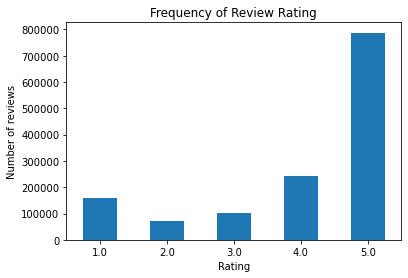

In [61]:
# Distribution of rating score
dfr.groupby('ratings').size().plot(kind='bar')
plt.title("Frequency of Review Rating")
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
_= plt.xticks(rotation=0)

<AxesSubplot:xlabel='productId'>

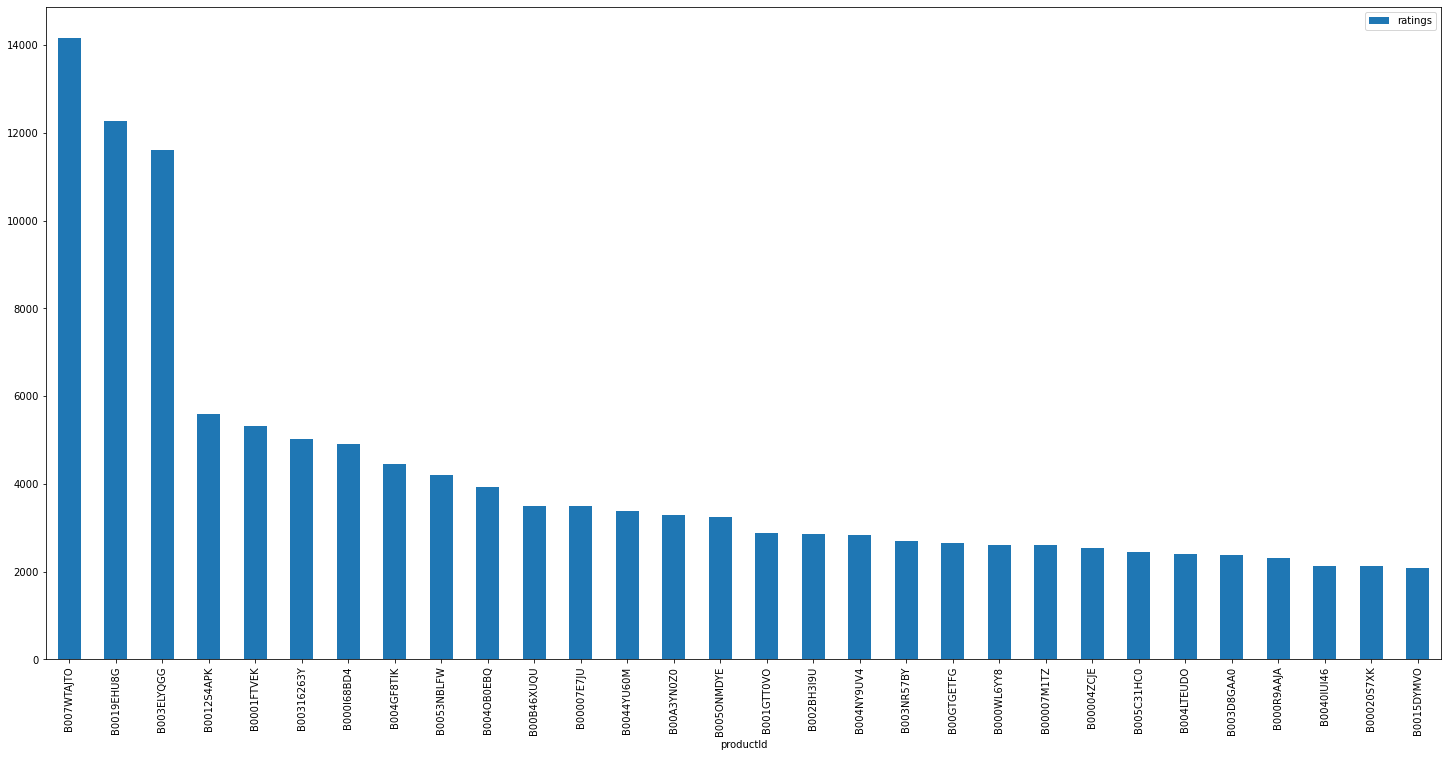

In [47]:
# puplar products
df_popular_pd = pd.DataFrame(dfr_new.groupby('productId')['ratings'].count())
most_popular = df_popular_pd.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(25, 12))

In [48]:
# Classify ratings as good
good_rate = len(dfr[dfr['ratings'] >= 3])
bad_rate = len(dfr[dfr['ratings'] < 3])
print ('Good ratings : {}'.format(good_rate))
print ('Bad ratings : {} '.format(bad_rate))

Good ratings : 1133943
Bad ratings : 231188 


In [49]:
dfr['rating_class'] = dfr['ratings'].apply(lambda x: 'bad' if x < 3 else'good')

In [50]:
#time object to datetime and create a new column named 'time'
dfr['time'] = dfr["reviewTime"].str.replace(',', "")
dfr['time'] = pd.to_datetime(dfr['time'], format = '%m %d %Y')
dfr['year'] = dfr['time'].dt.year

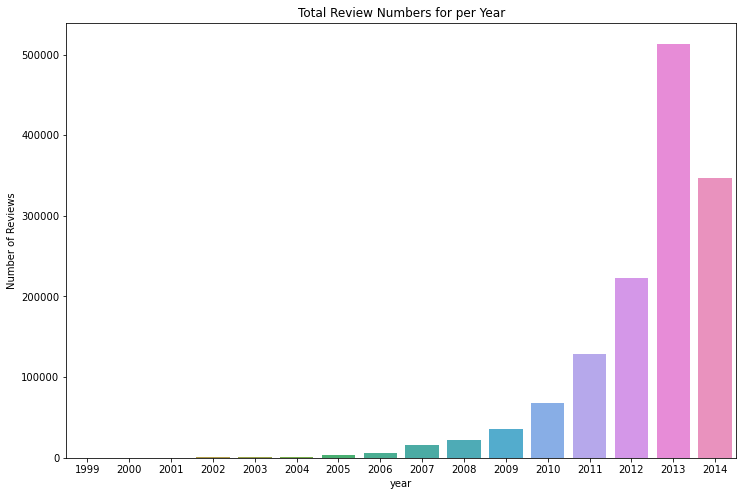

2013    513513
2014    346501
2012    223490
2011    128834
2010     67371
2009     35128
2008     22228
2007     15586
2006      5825
2005      2900
2004      1298
2003      1172
2002       597
2001       366
2000       312
1999        10
Name: year, dtype: int64

In [66]:
#review for every year
plt.figure(figsize = (12,8))
sns.countplot(x=dfr['year'])
plt.title('Total Review Numbers for per Year')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
dfr['year'].value_counts()

Number of reviews was maximum in the year 2013.Looks there were hardly ratings done on products till 2002 and slowly started from 2003.

In [52]:
unique_cust = dfr.groupby('year')['reviewerId'].nunique()
print(f'Number of unique customers: {unique_cust.sum()}')

Number of unique customers: 1151618


In [53]:
# Print unique customer numbers in each year
print(unique_cust)

year
1999        10
2000       294
2001       351
2002       575
2003      1142
2004      1255
2005      2755
2006      5533
2007     14563
2008     20669
2009     32483
2010     61782
2011    115009
2012    192277
2013    414734
2014    288186
Name: reviewerId, dtype: int64


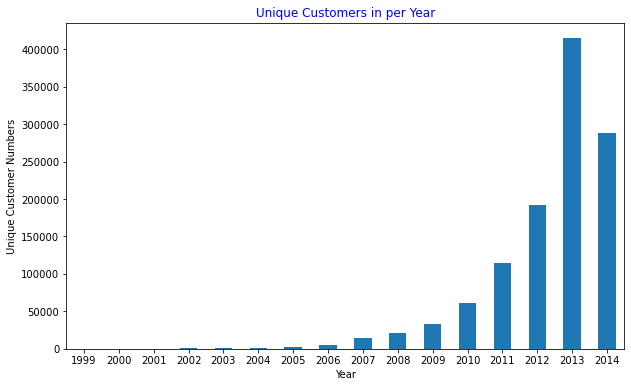

In [65]:
# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in per Year', color='b', size = 12)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

Customer were on year 2013,flowwed with year 2014 and 2012. looks not much of cstomer into online stores till 2005.

In [55]:
# unique customers for each "rating class"
a = list(dfr.groupby(['rating_class'])['reviewerId'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(dfr['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating': ['bad', 'good'],
                               'customers': a2,
                               'reviews': sorted(b)})
print(uniq_cust_rate)

  rating  customers  reviews
0    bad     219651   231188
1   good     860270  1133943


In [56]:
#unique product
unique_prod = dfr.groupby('year')['productId'].nunique()
print(f'Number of unique products: {unique_prod.sum()}')

Number of unique products: 96358


In [57]:
# Print unique product numbers in each year
print(unique_prod)

year
1999        7
2000       76
2001      104
2002      129
2003      186
2004      287
2005      542
2006      804
2007     1769
2008     2482
2009     3827
2010     7002
2011    11177
2012    17387
2013    26257
2014    24322
Name: productId, dtype: int64


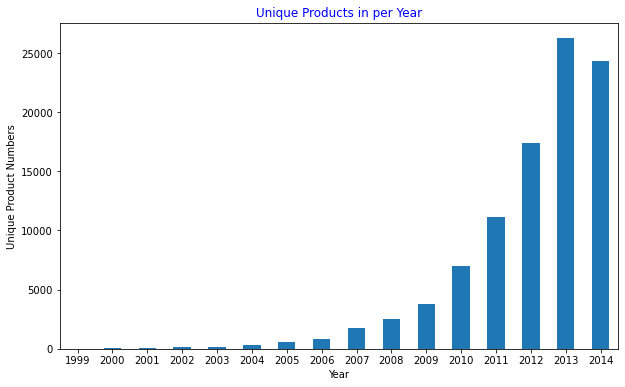

In [64]:
# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in per Year', color = 'b', size = 12)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

Looks not much of products till 2007 and year 2013 has seen more products

### Summary

Data set had 1m rows and with no null values. out of 17 features only 4 features viz.,'reviewerId', 'productId', 'ratings','timestamp' are considered.Various types of distribution are looked at to get a better understanding of data. here is the summary of insights - Number of reviews: 1365131 Number of unique reviewers = 1036895 Number of unique products = 35192 Average rating score: 4.046
Products were rated with discrete numbers 1,2,3,4,5. single Reviewer rated more than 50 times. This shows customers are buying many products from this store.
From 1999 to 2004, not many reviews were given, maybe customers were buying less product, or reviews and ratings were not that significant for product purchase.
